Playground Prediction Competition

EDA - 로지스틱회귀 - 피처엔지니어링 - 검증데이터 훈련에 이용

In [1]:
!unzip /content/cat-in-the-dat.zip

Archive:  /content/cat-in-the-dat.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
train = pd.read_csv('./train.csv',index_col='id')
test =  pd.read_csv('./test.csv',index_col='id')
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [5]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [ ]:
test.head()

feature summary

In [33]:
def resumetable(df):
  summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측치 개수'] = df.isnull().sum().values
  summary['고유값 개수'] = [len(train[col].unique()) for col in train.columns]
  summary['첫번째 값'] = df.iloc[0].values
  summary['두번째 값'] = df.iloc[1].values
  summary['세번째 값'] = df.iloc[2].values
  return summary

resumetable(train)

,피처,데이터타입,결측치 개수,고유값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [44]:
for col in ['ord_0','ord_1','ord_2']:
  print(f'{col} : {train[col].unique()}')

ord_0 : [2 1 3]
ord_1 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [45]:
for col in ['ord_3','ord_4','ord_5']:
  print(f'{col} : {train[col].unique()}')

ord_3 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' 'Os' 'Ps' 

In [46]:
for col in ['day','month','target']:
  print(f'{col} : {train[col].unique()}')

day : [2 7 5 4 3 1 6]
month : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target : [0 1]


시각화

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

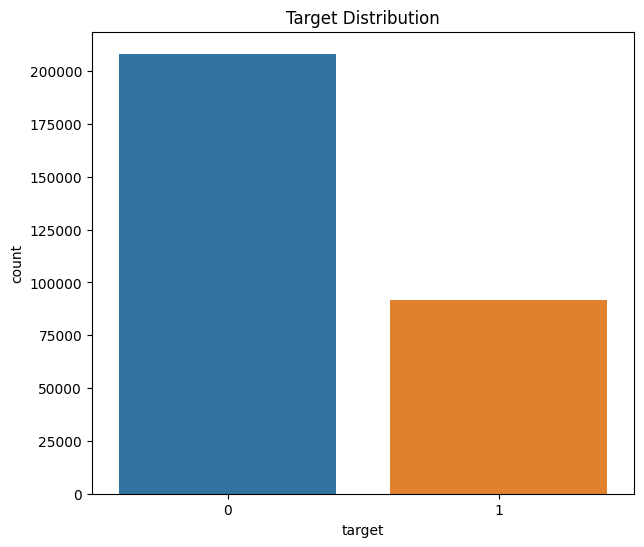

In [55]:
plt.figure(figsize=(7,6))
ax = sns.countplot(data = train, x='target')
ax.set_title('Target Distribution')
plt.show()

In [61]:
rectangle =  ax.patches[0]
rectangle.get_height(), rectangle.get_width(), rectangle.get_x()

(208236.0, 0.8, -0.4)

In [63]:
print('text x 좌표',rectangle.get_x()+ rectangle.get_width()/2.0)
print('text y 좌표',rectangle.get_height()+ len(train)*0.001)

text x 좌표 0.0
text y 좌표 208536.0


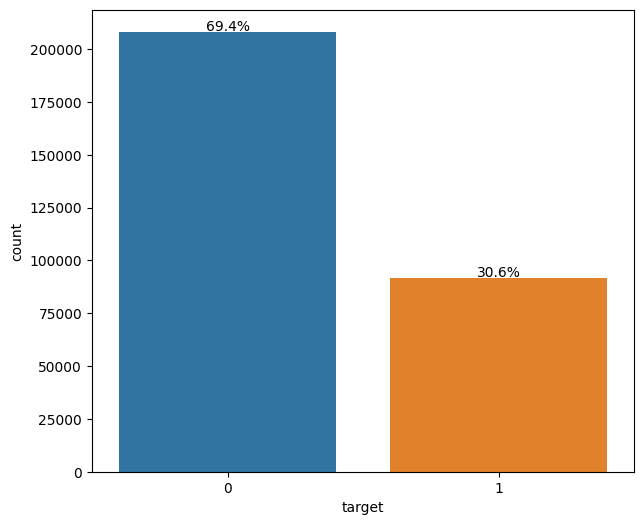

In [135]:
def write_percent(ax, total_size):
  for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = height/total_size*100
    ax.text(
        x = left_coord+width/2.0,
        y = height + total_size*0.001,
        s = f'{percent:1.1f}%',
        ha = 'center'
    )
plt.figure(figsize=(7,6))
ax = sns.countplot(data=train,x='target')
write_percent(ax, len(train))

plt.show()

이진피처분포
  - 고윳값이 특정 타깃값에 치우치는지 확인할 수 있음

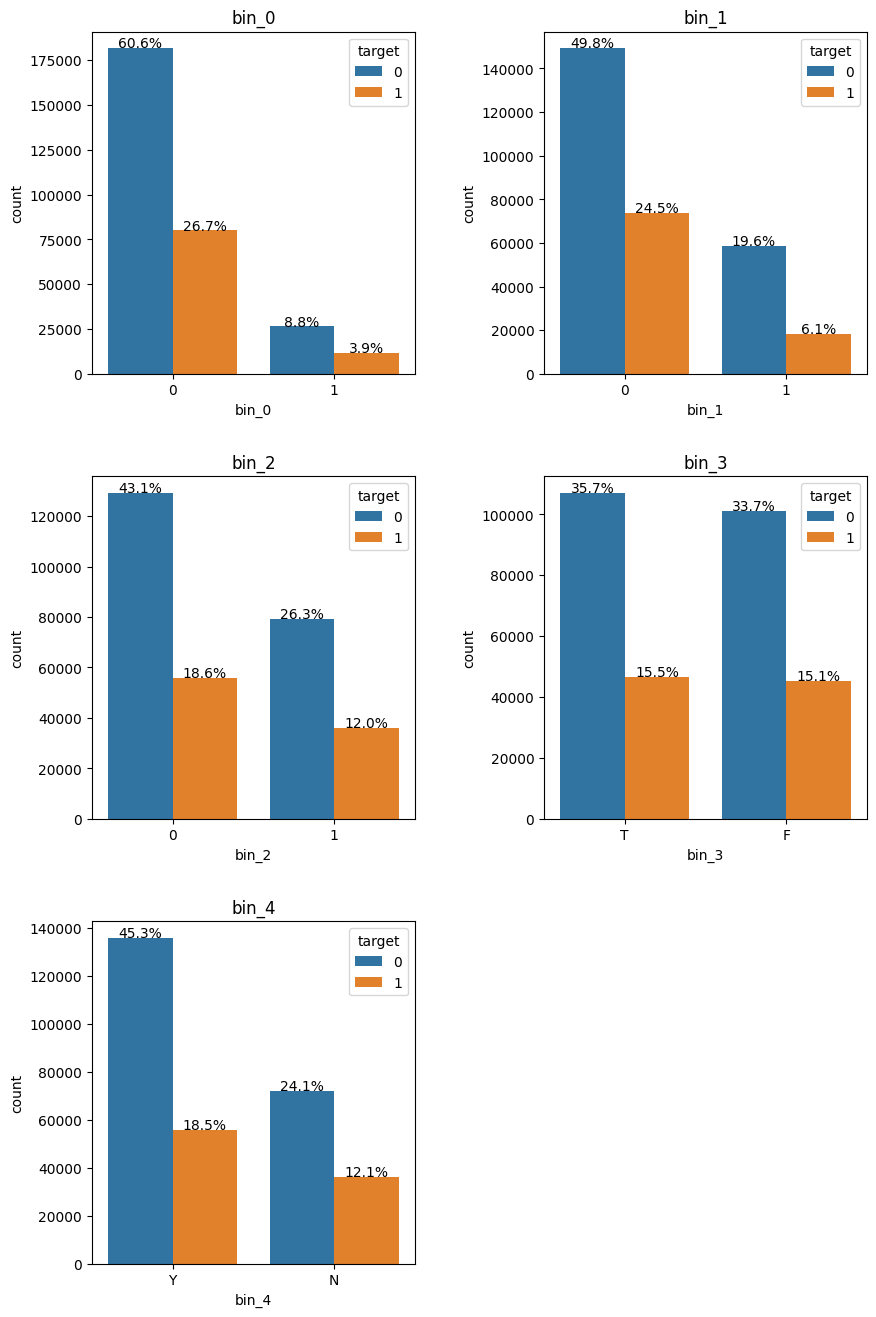

In [136]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_'+str(i) for i in range(5)]
for idx, feature in enumerate(bin_features):
  ax = plt.subplot(grid[idx])
  ax.set_title(feature)
  sns.countplot(data=train,x=feature,ax=ax, hue='target')
  write_percent(ax,len(train))

In [137]:
# 카테고리 또는 명목형 피처의 교차표를 구한다
# 피처별 타깃1의 비율을 구하기위해서  plot형태의 표를 위해서
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [138]:
crosstab = pd.crosstab(train['nom_0'], train['target'],normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [139]:
crosstab.reset_index() # 그래프그리기 편하기 위해서

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [140]:
def get_crosstab(df,feature):
  crosstab = pd.crosstab(train[feature], train['target'],normalize='index')*100
  crosstab = crosstab.reset_index()
  return crosstab

In [141]:
get_crosstab(train,'nom_0')

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [142]:
# 피처별 타깃1의 비율
get_crosstab(train,'nom_0')[1]  # 여기서 1은 컬럼명

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

point plot

In [143]:
from matplotlib import legend
def plot_pointplot(ax, feature,crosstab):
  ax2 = ax.twinx() # x축을 공유하는 새로운 y축  생성
  ax2 = sns.pointplot(x=feature,y=1,data=crosstab,order=crosstab[feature].values,
                      color='black')
  ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
  ax2.set_ylabel('Target 1 Ratio(%)')

In [144]:
def plot_with_true_ratio(df,feature,num_rows,num_cols,size=(15,20)):
  plt.figure(figsize=size)
  grid = gridspec.GridSpec(num_rows,num_cols)
  plt.subplots_adjust(wspace=0.45, hspace=0.3)

  for idx, feature in enumerate(feature):
    ax = plt.subplot(grid[idx])
    crosstab = get_crosstab(df, feature)
    sns.countplot(x=feature,data=df,order=crosstab[feature].values,color='skyblue',ax=ax)
    write_percent(ax,len(df))
    plot_pointplot(ax,feature,crosstab)
    ax.set_title(f'{feature} Distrubution')

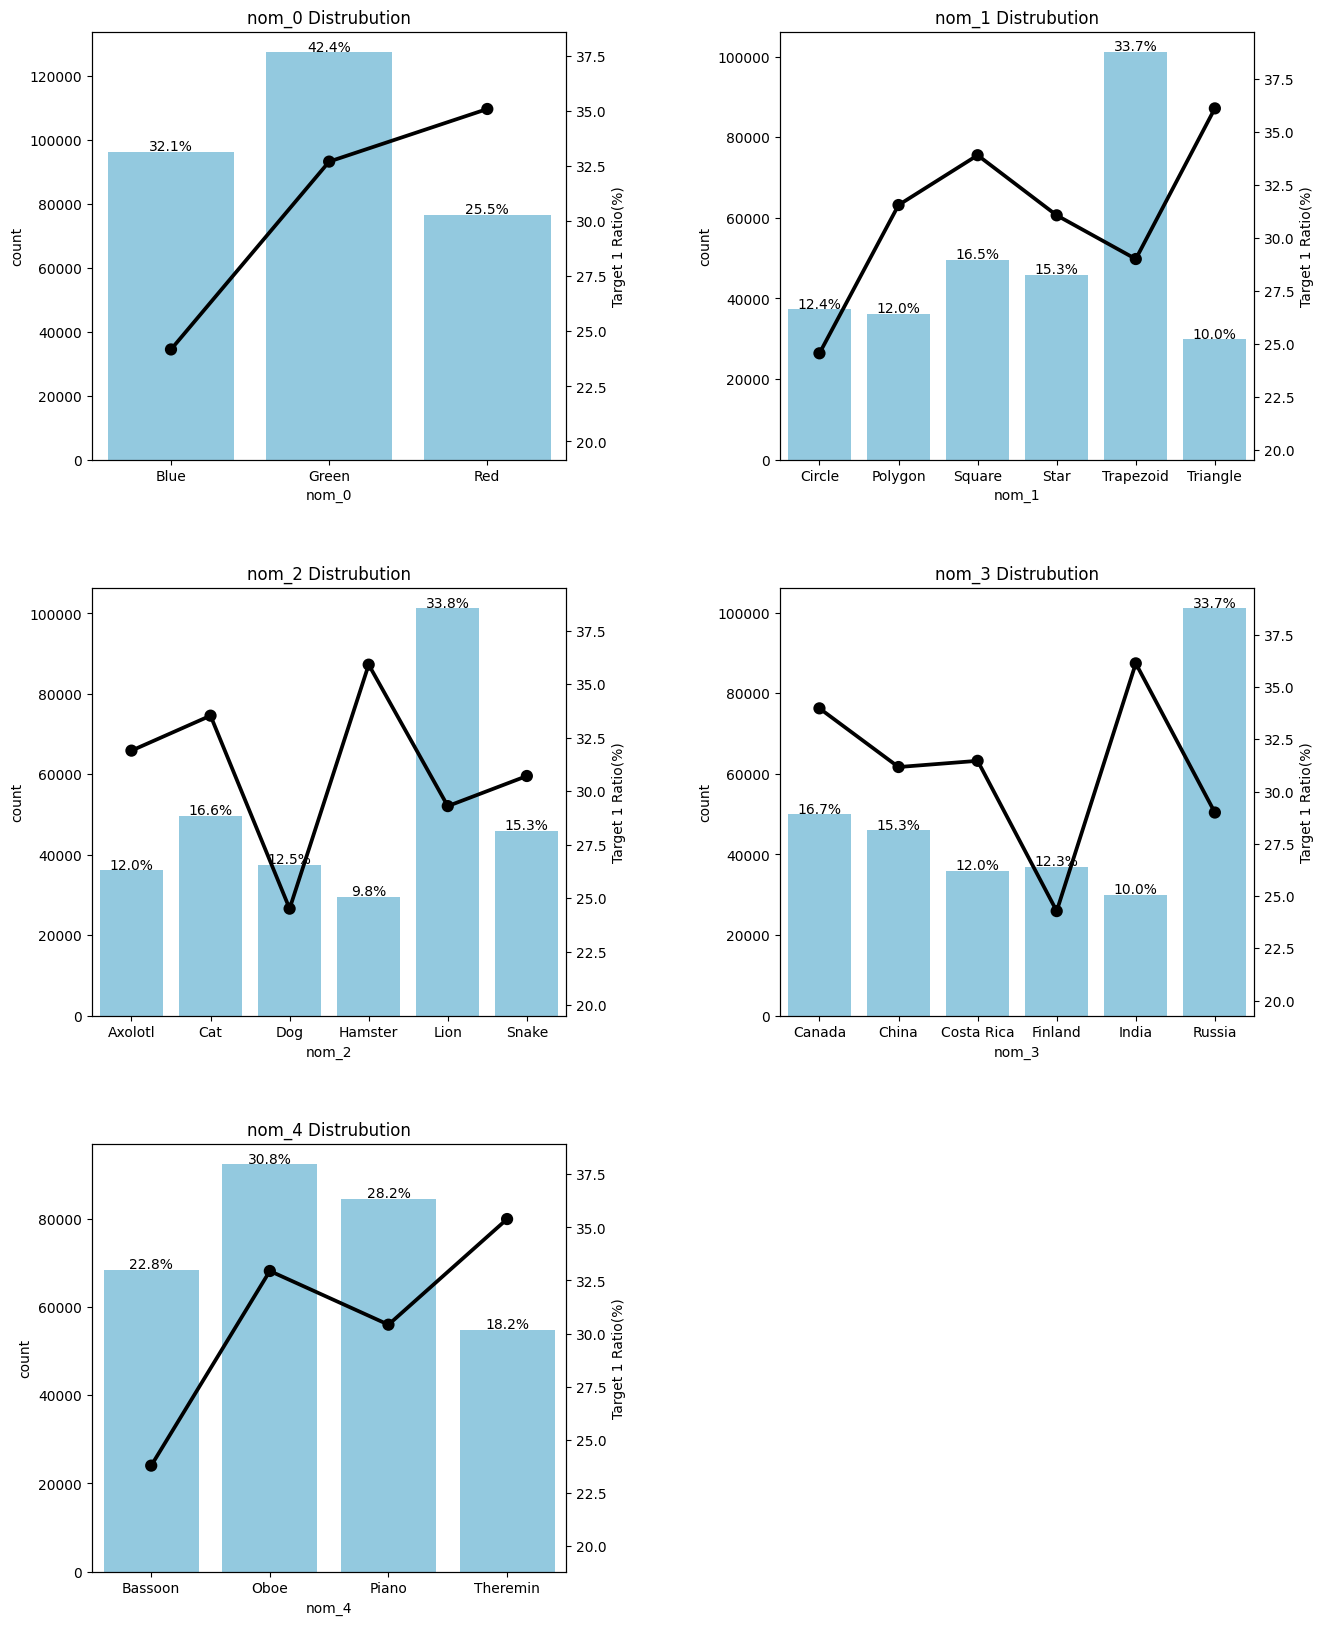

In [145]:
num_features = ['nom_'+str(i) for i in range(5)]
plot_with_true_ratio(train,num_features,num_rows=3,num_cols=2)

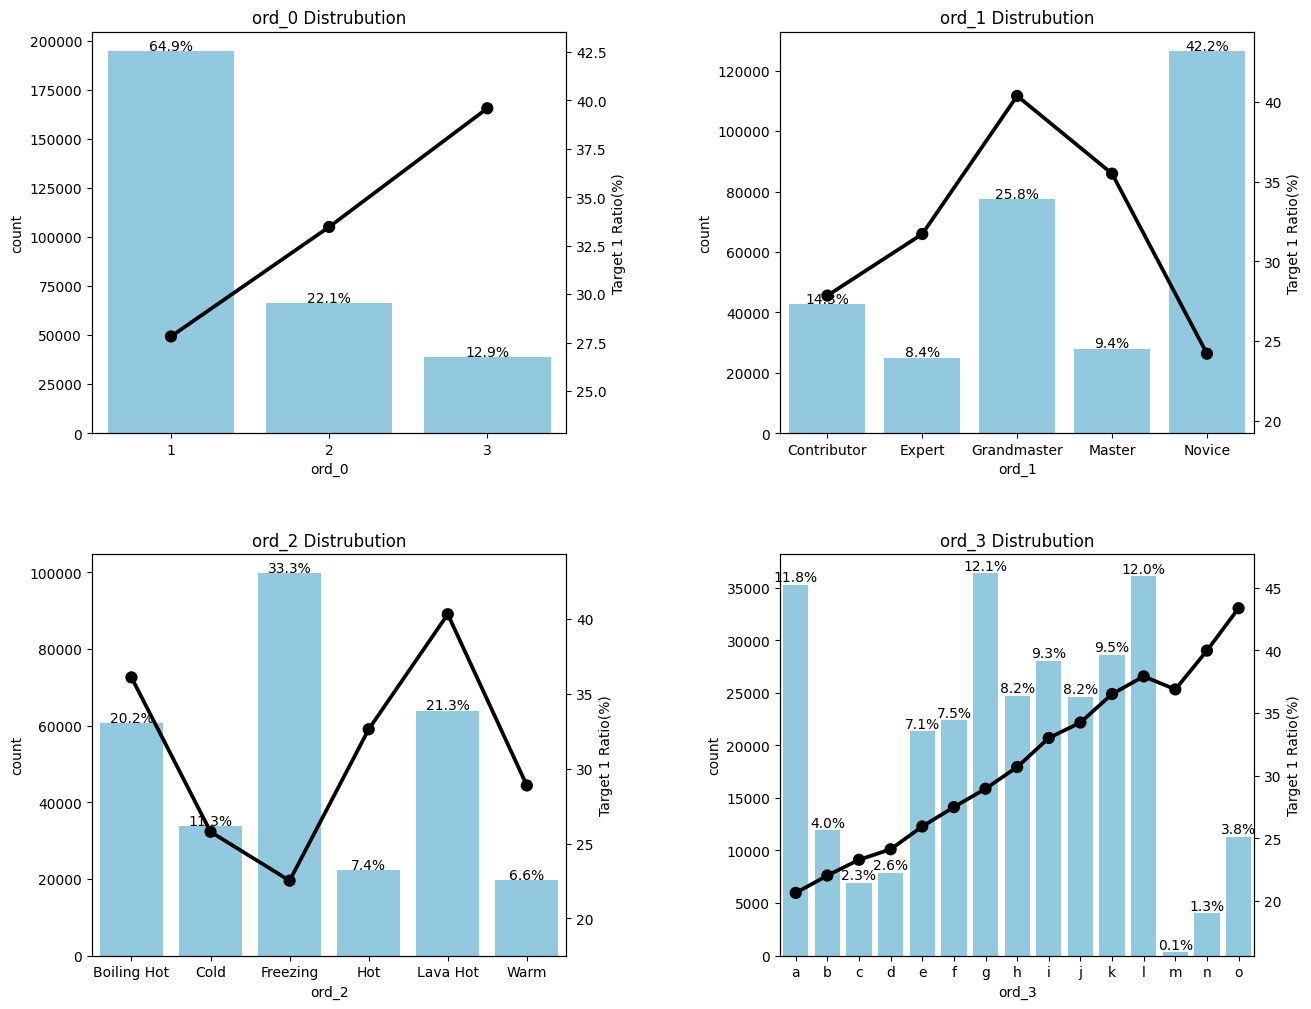

In [146]:
num_features = ['ord_'+str(i) for i in range(4)]
plot_with_true_ratio(train,num_features,num_rows=2,num_cols=2,size=(15,12))

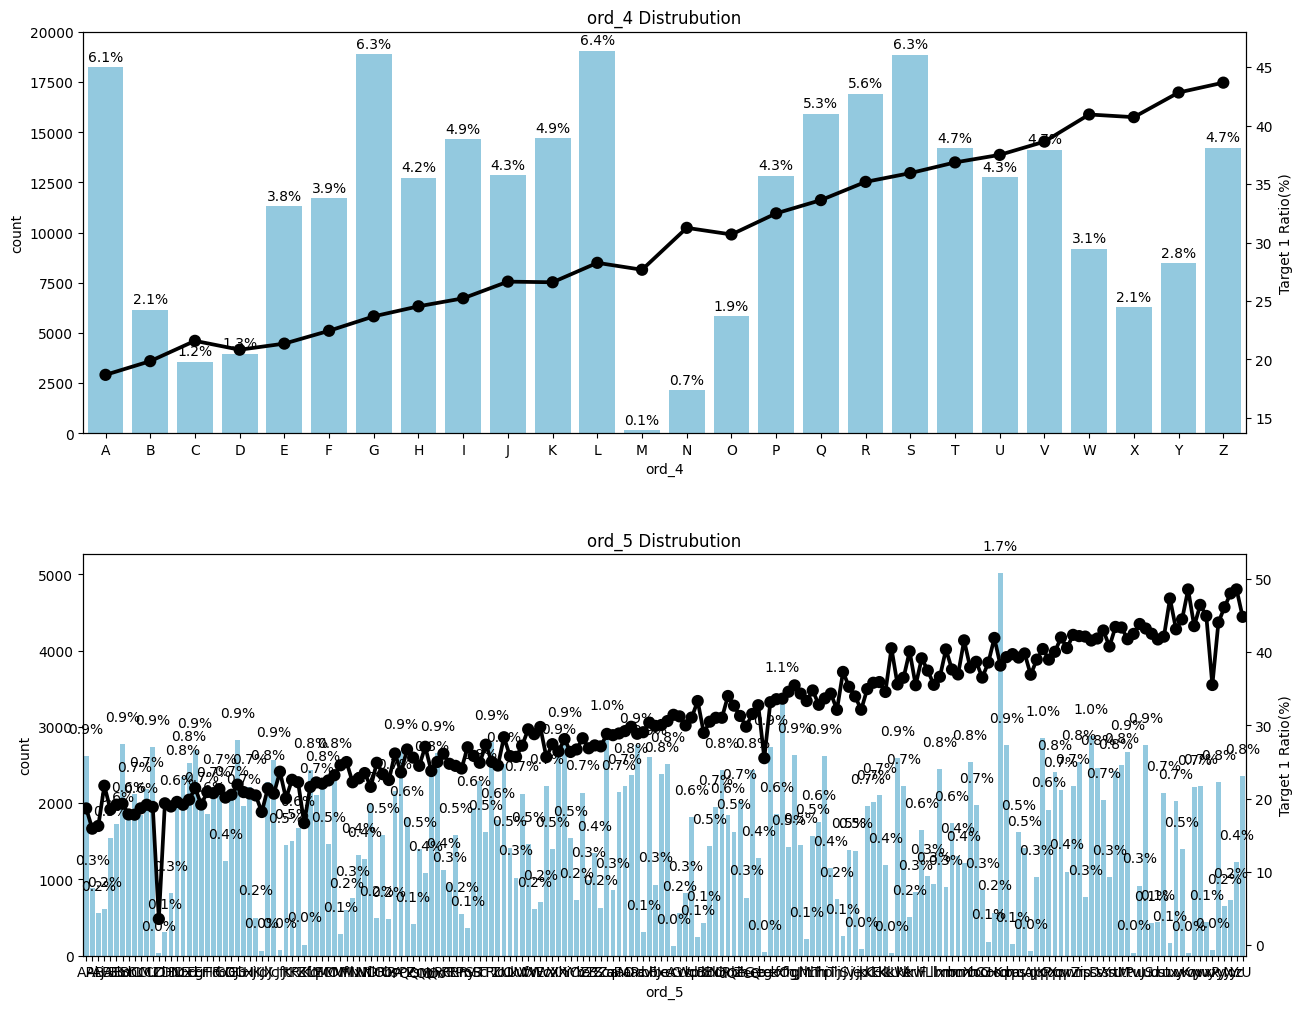

In [147]:
num_features = ['ord_'+str(i) for i in range(4,6)]
plot_with_true_ratio(train,num_features,num_rows=2,num_cols=1,size=(15,12))

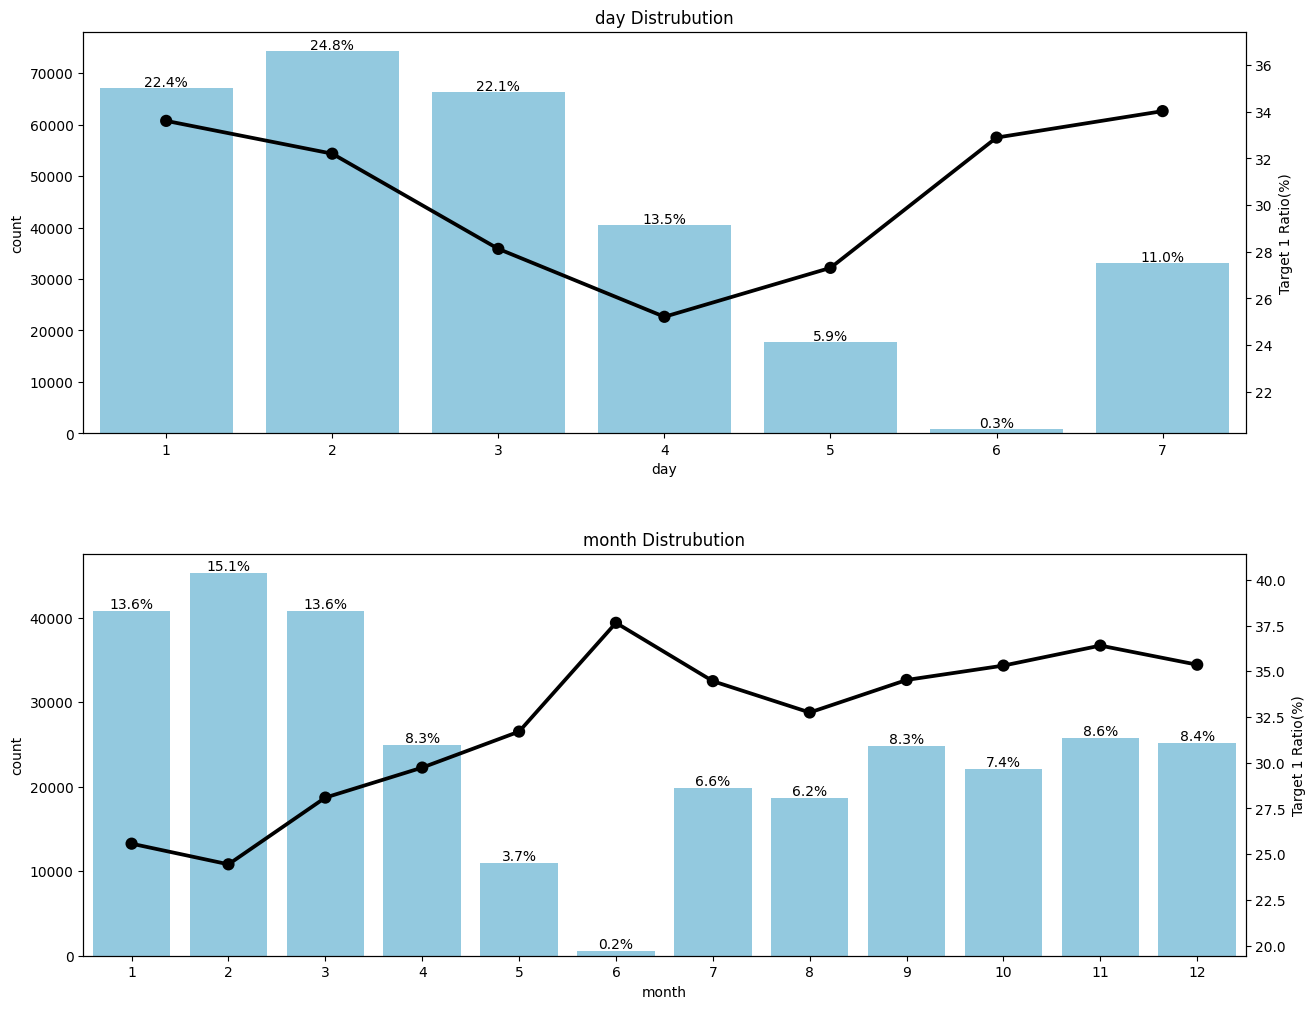

In [148]:
num_features = ['day','month']
plot_with_true_ratio(train,num_features,num_rows=2,num_cols=1,size=(15,12))

모든 피처는 ont-hot

모델 : 로지스틱 회귀

In [150]:
# 데이터 합치기
all_data = pd.concat([train,test])
all_data = all_data.drop(columns='target',axis=1)
all_data = all_data.reset_index(drop=True)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1
499998,1,0,0,T,Y,Blue,Star,Hamster,Costa Rica,Bassoon,...,606ac930b,d4cf587dd,2,Grandmaster,Boiling Hot,g,X,Ye,2,1


In [151]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
all_data_encoder = encoder.fit_transform(all_data)

In [153]:
num_train = len(train)
X_train = all_data_encoder[:num_train]
X_test = all_data_encoder[num_train:]
y = train['target']

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X_train,y,test_size=0.1,stratify=y,random_state=45)

LogisticRegression 으로 훈련

In [155]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,random_state=42)
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [160]:
# 타겟이 1일 확률을 예측하는 문제
y_valid_pred = logistic_model.predict_proba(x_test)[:,1]
# 타깃이 1일 확률을 저장

In [162]:
# ROC AUC 점수를
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_valid_pred)
roc_auc

0.7978240947672544

##### 성능개선

In [ ]:
# 이진피처와 순서형 피처 ord_1, ord_2 : 수작업
# 순서형 ord_3, 4, 5 ordinal 인코딩
# 명목형과 날짜형은 원-핫인코딩

In [163]:
# 스케일링

In [164]:
# 하이퍼파라메터 최적화

In [165]:
import pandas as pd
train = pd.read_csv('./train.csv',index_col='id')
test =  pd.read_csv('./test.csv',index_col='id')
train.head()
# 인코딩 순서
# 이진피처 - 순서형피치 - 명목형 피치 - 날짜 피처순

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [166]:
all_data = pd.concat([train,test])
all_data = all_data.drop('target',axis=1)

##### 피처인코딩

In [167]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0,'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0,'Y':1})

In [169]:
# 순서형 피처
# ord_1, ord_2 순서를 정해서 인코딩
# ord_3 ~ 5 알파벳순으로 인코딩

In [174]:
train['ord_1'].unique()
ord1dict = {
    'Novice':0, 'Contributor':1,'Expert':2,'Master':3,'Grandmaster':4
}
ord2dict = {
    'Freezing':0,'Cold':1,'Warm':2,'Hot':3,'Boiling Hot':4,'Lava Hot':5
}
all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [173]:
train['ord_2'].unique()

array(['Cold', 'Hot', 'Lava Hot', 'Boiling Hot', 'Freezing', 'Warm'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_345 = ['ord_3','ord_4','ord_5']
ord_encoder =  OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])
all_data[ord_345]

In [180]:
# 피처별 인코딩 순서 출력
ord_encoder.categories_

[array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'o'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
       dtype=object),
 array(['AP', 'Ai', 'Aj', 'BA', 'BE', 'Bb', 'Bd', 'Bn', 'CL', 'CM', 'CU',
        'CZ', 'Cl', 'DH', 'DN', 'Dc', 'Dx', 'Ed', 'Eg', 'Er', 'FI', 'Fd',
        'Fo', 'GD', 'GJ', 'Gb', 'Gx', 'Hj', 'IK', 'Id', 'JX', 'Jc', 'Jf',
        'Jt', 'KR', 'KZ', 'Kf', 'Kq', 'LE', 'MC', 'MO', 'MV', 'Mf', 'Ml',
        'Mx', 'NV', 'Nf', 'Nk', 'OR', 'Ob', 'Os', 'PA', 'PQ', 'PZ', 'Ps',
        'QM', 'Qb', 'Qh', 'Qo', 'RG', 'RL', 'RP', 'Rm', 'Ry', 'SB', 'Sc',
        'TR', 'TZ', 'To', 'UO', 'Uk', 'Uu', 'Vf', 'Vx', 'WE', 'Wc', 'Wv',
        'XI', 'Xh', 'Xi', 'YC', 'Yb', 'Ye', 'ZR', 'ZS', 'Zc', 'Zq', 'aF',
        'aM', 'aO', 'aP', 'ac', 'av', 'bF', 'bJ', 'be', 'cA', 'cG', 'cW',
        'ck', 'cp', 'dB', 'dE', 'dN', 'dO', 'dP', 'dQ', 'd

In [181]:
# 명목형 피처 인코딩

In [ ]:
nom_features = [ 'nom_'+str(i) for i in range(10)]
nom_features

In [184]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
encoded_nom_matrix =  onehot.fit_transform(all_data[num_features])
encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [187]:
# 명목형 피처제거
all_data = all_data.drop(nom_features,axis=1)

In [188]:
# 날짜
date_feature = ['day','month']
encoded_date_matrix = onehot.fit_transform(all_data[date_feature])
all_data = all_data.drop(date_feature,axis=1)
encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

##### 피처  스케일링

In [189]:
# 이진,명목형,날짜는 0과 1을 갖는 인코딩
#  순서형은 다양한 값으로 이루어져 있음
# min-max 정규화를 사용

In [191]:
from sklearn.preprocessing import MinMaxScaler
ord_feature = ['ord_'+str(i) for i in range(6)]
all_data[ord_feature] = MinMaxScaler().fit_transform(all_data[ord_feature])

In [192]:
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,,,,,,
0,0,0,0,1,1,0.5,1.00,0.2,0.500000,0.12,0.712042
1,0,1,0,1,1,0.0,1.00,0.6,0.000000,0.00,0.486911
2,0,0,0,0,1,0.0,0.50,1.0,0.500000,0.68,0.162304
3,0,1,0,0,1,0.0,1.00,0.8,0.571429,0.12,0.701571
4,0,0,0,0,0,0.0,1.00,0.0,0.000000,0.68,0.827225
...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0.0,0.00,1.0,0.642857,0.00,0.130890
499996,1,0,0,0,1,0.0,0.25,1.0,0.357143,0.72,0.089005
499997,0,1,1,1,1,0.0,0.00,0.8,0.428571,0.84,0.345550


In [193]:
# 합치기
# one-hot으로 변경된 데이터는 CSR 형식의행렬
# 원핫처럼 희소행렬은 컬럼이 굉장히 많이 늘어나므로
# COO(cordinate list) CSR(compressed sparse row)  CSR 이 성능이 좋음
# 원핫 - CSR형식


In [196]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csc_matrix(all_data),
                               encoded_nom_matrix,encoded_date_matrix] ,format='csr')

In [197]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [198]:
# 데이터 분할
num_train = len(train)
x_train = all_data_sprs[:num_train]
x_test = all_data_sprs[num_train:]
y = train['target']

In [199]:
x_train,x_valid,y_test,y_valid = train_test_split(x_train,y,test_size=0.1,stratify=y,random_state=10)

In [200]:
# 하이퍼 파라메터 튜닝
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic_model = LogisticRegression()
lr_params = {
    'C':[0.1,0.125,0.2],
    'max_iter' : [800,900,1000],
    'solver':['liblinear'],
    'random_state':[42]
}
gridSearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,scoring='roc_auc',cv=5)
gridSearch_logistic_model.fit(x_train,y_train)
gridSearch_logistic_model.best_params_